Team Member Names here:

Jiwen Zhou, Zhi Yang, Huangfu Tong, Yang Sun


# 1. Business Understanding

Just like human beings, animals are also one of the most important parts of the ecosystem. The existence of various animals makes our world splendid. Furthermore, researches on animals are also beneficial to the development of human science and technology, for example, many bionic products, such as the sonar, are inspired by animals. Unfortunately, due to the influence of human activities and changes in the natural environment, more than 300 types of animals have disappeared on the earth forever in the past 300 years, a large group of animals are going extinct now. As we all know, the entire ecosystem is just like a net, whose components are linked together closely. If one species disappears, all its neighbors in the ecological network will be seriously affected.

As a result, besides scientifically controlling human activities, regular observation of animals in a specific area to examine changes there is also necessary. However, 24-hour observation by researchers is unsafe and impractical. With the support of modern science and technology, researchers can use electronic camera to collect photos in any area, no matter a rainforest or a desert. At the same time, a precise identification technology is needed to help realize some functions as follow. By the way, all the following functions are based on a background dataset including all known species for researchers to identify acquired pictures. First, researchers need to build a raw dataset of all local animals to determine the animal distribution in the area. Second, researchers can periodically compare the dataset to get the change of some species. Third, more importantly, researchers can detect some newly coming species, and determine whether it is a species invasion or an amazing new discovery.

The main aim of this lab assignment is to find a reliable detection algorithm for image data, then visualize and interpret results. Because it is only for practical purposes, we have chosen a relatively small dataset as the exercise database rather than all known animal species. If we hope results to have research value, the dataset need to be expanded. We hope the accuracy rate of our results can be more than 80% so that the workload of manual inspection can be reduced. Once the algorithm is realized correctly and performs efficiently, it can be well used by some zoologists and animal protection agencies.

These images sourcing from Google include 11 classes of animals including lions, zebras, flamingoes, rhinoceroses, wolves, monkeys, antelopes, tigers, kangaroos, rabbits and giraffes, and there are 100 pieces of pictures in every class. They are all collected within different areas, different periods and different distances. Animals in them have various postures, colors and quantities. Because we downloaded all the searching results in one page, some unmatched pictures are contained in the dataset by mistakes. We still need to make some pretreatment to delete them.
To clearly demonstrate our results, we will perform a series of processes on the raw data and built several visualizations. Moreover, we will investigate appropriate methods to extract some useful features and then compare them for possible interesting relationships.

Dataset: Pictures of 11 different classes of animals
Question of interest: Can we detect a newcomer by comparing with the raw image dataset?

# 2. Data Preparation

In [398]:
from PIL import Image
import os, numpy as np
from sklearn import datasets 

ds = datasets
data=np.array
target = []
j = 0
img = Image.open('animal/0/0.jpg').convert("L").resize((300,200))
for temp in range(11):
    folder = 'animal/' + str(temp) +'/'
    
    read = lambda imname: np.asarray(Image.open(imname).resize((300,200)).convert("RGB"))
    
    ims = [read(os.path.join(folder, filename)) for filename in os.listdir(folder)]

    for i in ims:
        if j==0:
            h, w, d = i.shape
            data = np.array(i.flatten())
        else:
            
            data = np.vstack((data,np.array(i.flatten())))
        target.append(temp)
        j += 1

ds.data = np.array(data)
ds.target = np.array(target)
print(ds.target)
print(ds.data)     

[ 0  0  0 ..., 10 10 10]
[[128 157 217 ..., 109  94  75]
 [  1   1   1 ...,   1   1   1]
 [189 165 119 ..., 110  96  69]
 ..., 
 [240 242 241 ..., 156 167  62]
 [171 183 197 ...,  87  83  19]
 [ 27 185 233 ..., 132 203 245]]


In [399]:
from __future__ import print_function
import math
n_classes = len(ds.target)
X = ds.data
Y = ds.target

n_samples = X.shape[0]
n_features = X.shape[1]
n_classes = len(np.unique(Y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print(X.shape)

n_samples: 1203
n_features: 180000
n_classes: 11
(1203, 180000)


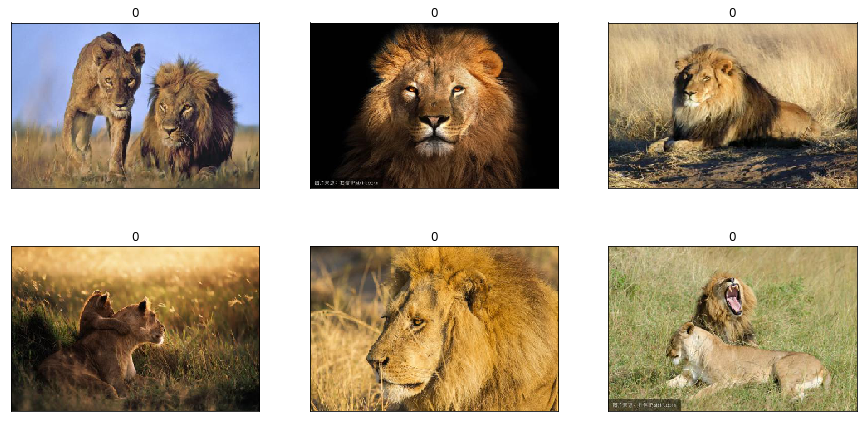

In [401]:
# import matplotlib.pyplot
# for i in ims[:1]:
#     matplotlib.pyplot.imshow(i)
#     matplotlib.pyplot.show()
def plot_gallery(images, titles, h, w, d, n_row=2, n_col=3):
    """Helper function to plot a gallery of portraits"""
    from matplotlib import pyplot as plt
    plt.figure(figsize=(4 * n_col, 3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h,w,d)))
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
plot_gallery(X, Y, h, w, d)


# 3. Data Reduction

## 3.1 Full PCA

In [402]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

#print ("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))
n_components=800
pca = PCA(n_components=n_components)
pca.fit(X.copy())
eigenanimals = pca.components_
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


In [403]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
    
plot_explained_variance(pca)

[[ 0.77758535  0.74228085  0.74032325 ...,  0.60635382  0.56946378
   0.61619406]
 [ 0.38791317  0.32135854  0.37487798 ...,  0.63318186  0.63015664
   0.73094399]
 [ 0.79463375  0.55445703  0.30550257 ...,  0.68106269  0.55944866
   0.45043467]
 ..., 
 [ 0.42144067  0.3309048   0.40441927 ...,  0.78719984  0.67742361
   0.65968168]
 [ 0.49742393  0.5254065   0.29097922 ...,  0.32215241  0.32509134
   0.31587967]
 [ 0.42875822  0.40117571  0.52309024 ...,  0.45802877  0.42114025
   0.45229795]]


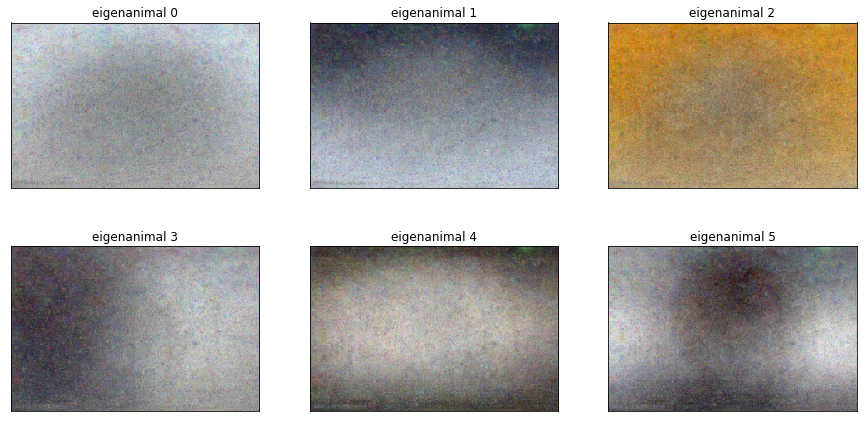

In [404]:
from sklearn.preprocessing import MinMaxScaler
eigenface_titles = ["eigenanimal %d" % i for i in range(eigenanimals.shape[0])]
eigenanimals = MinMaxScaler().fit_transform(eigenanimals)    
print(eigenanimals)
plot_gallery(eigenanimals, eigenface_titles, h, w,d)

In [405]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 3    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

[[ 195.43437277  152.18747986   79.65488387 ...,    1.20805578
     2.32317844   -0.76031261]]


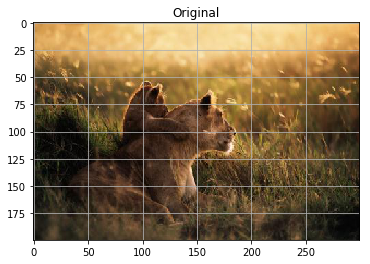

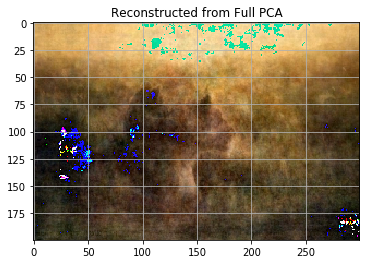

In [406]:
import matplotlib.pyplot as plt
plt.figure().add_subplot(1,1,1)
plt.imshow(X_idx.reshape((h, w, d)))
plt.title('Original')
plt.grid()
plt.figure().add_subplot(1,1,1)
print(reconstructed_image)
reconstructed_image = reconstructed_image.astype('uint8')
plt.imshow(reconstructed_image.reshape((h, w, d)))
plt.title('Reconstructed from Full PCA')
plt.grid()
plt.show()

## 3.2 Random PCA

In [407]:
n_components = 800
print ("Extracting the top %d eigenanimals from %d animals" % (
    n_components, X.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(X.copy())
eigenanimals = rpca.components_

Extracting the top 800 eigenanimals from 1203 animals
CPU times: user 3min 57s, sys: 9.83 s, total: 4min 7s
Wall time: 1min 41s


[[ 0.72325877  0.70125112  0.74266567 ...,  0.639845    0.63630487
   0.65432794]
 [ 0.36079127  0.31562843  0.37606408 ...,  0.6663984   0.697823
   0.77519375]
 [ 0.73911695  0.52917868  0.30646915 ...,  0.71378907  0.62615357
   0.47973398]
 ..., 
 [ 0.50191852  0.52886217  0.43008698 ...,  0.12632501  0.16338156
   0.10711146]
 [ 0.74433253  0.56080077  0.47113781 ...,  0.7257396   0.72770248
   0.72135567]
 [ 0.47710484  0.48674617  0.44477835 ...,  0.69193404  0.76459815
   0.64960444]]


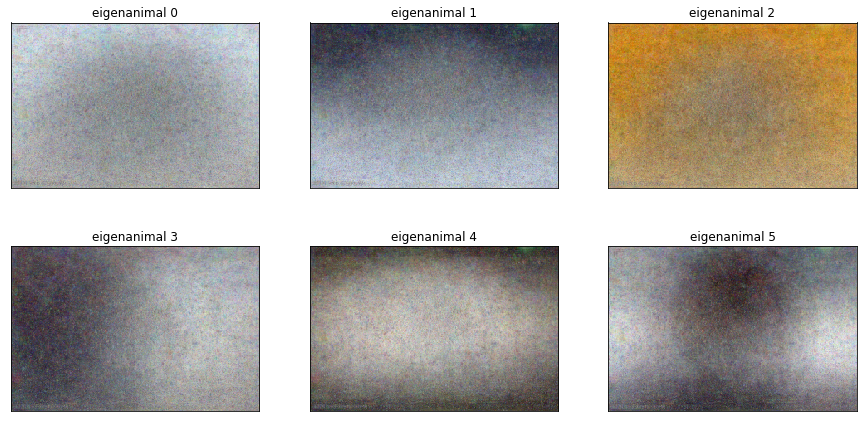

In [408]:
eigenanimal_titles = ["eigenanimal %d" % i for i in range(eigenanimals.shape[0])]
eigenanimals = MinMaxScaler().fit_transform(eigenanimals)    
print(eigenanimals)
plot_gallery(eigenanimals, eigenanimal_titles, h, w, d)


The “classic” PCA approach described above is a linear projection technique that works well if the data is linearly separable. However, in the case of linearly inseparable data, a nonlinear technique is required if the task is to reduce the dimensionality of a dataset.



## 3.3 Kernal PCA

In [319]:
%%time
# SKIP THIS BECAUSE IT TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 800
# print(np.sum(~np.isfinite(X)))
print ("Extracting the top %d eigenanimals from %d animals" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=15, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 800 eigenanimals from 1203 animals
CPU times: user 35min 11s, sys: 11 s, total: 35min 22s
Wall time: 17min 53s


In [409]:
import pickle

pickle.dump(kpca, open( 'large_data/kpca.p', 'wb' ))

In [410]:
import pickle
kpca_loaded = pickle.load(open( 'large_data/kpca.p', 'rb' ))

In [411]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter('ignore', DeprecationWarning)

from ipywidgets import widgets  # make this interactive!
# compare the different methods

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image = reconstructed_image.astype('uint8')
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = reconstructed_image_rpca.astype('uint8')
    reconstructed_image_kpca = kpca_loaded.inverse_transform(kpca_loaded.transform(X[idx_to_reconstruct].reshape(1, -1)))/255.0

    plt.figure(figsize=(30,24))
    plt.subplot(1,4,1)
    plt.imshow(X[idx_to_reconstruct].reshape((h, w, d)))
    plt.title(Y[idx_to_reconstruct])
    plt.grid()
    
    plt.figure(figsize=(30,24))
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w, d)))
    plt.title('Full PCA')
    plt.grid()

    plt.figure(figsize=(30,24))
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w, d)))
    plt.title('Randomized PCA')
    plt.grid()

    plt.figure(figsize=(30,24))
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w, d)))
    plt.title('Kernel PCA')
    plt.grid()
    plt.show()
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

A Jupyter Widget

<function __main__.plt_reconstruct>

We can clearly see that the projection via RBF kernel PCA yielded a subspace where the classes are separated well. Such a subspace can then be used as input for linear classification models, such as Support Vector Machines or naive.  We think that the present work will not be the last application of the kernel method in constructing a rather general and still feasible nonlinear variant of a classical algorithm. Indeed we have mentioned and in part outlined a number of techniques which could be made nonlinear with essentially the same method. Some of them are currently under investigation in particular the development.

## 3.4 Image Feature: DAISY Bag of Features Model

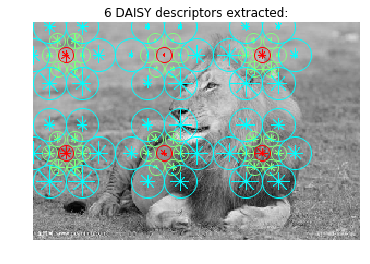

In [412]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

img = np.array(img).reshape((h,w))
descs, descs_img = daisy(img, step=90, radius=30, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

In [413]:
# now let's understand how to use it
features = daisy(img,step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(18, 28, 72)
36288


In [414]:
# create a function to tak in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))
j = 0
for temp in range(11):
    folder = 'animal/' + str(temp) +'/'
    
    read = lambda imname: np.asarray(Image.open(imname).resize((300,200)).convert("L"))
    
    ims = [read(os.path.join(folder, filename)) for filename in os.listdir(folder)]

    for i in ims:
        if j==0:
            h, w = i.shape
            data = np.array(i.flatten())
        else:           
            data = np.vstack((data,np.array(i.flatten())))
        target.append(temp)
        j += 1

X = np.array(data)
Y = np.array(target)


%time test_feature = apply_daisy(X[3],(h,w))

test_feature.shape

CPU times: user 73.7 ms, sys: 78.4 ms, total: 152 ms
Wall time: 152 ms


(52416,)

In [415]:
0.027 * len(X) # approximate how long it may run

32.481

In [416]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

CPU times: user 1min 24s, sys: 12 s, total: 1min 36s
Wall time: 1min 36s
(1203, 52416)


In [417]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 3.71 s, sys: 34.7 ms, total: 3.74 s
Wall time: 1.04 s


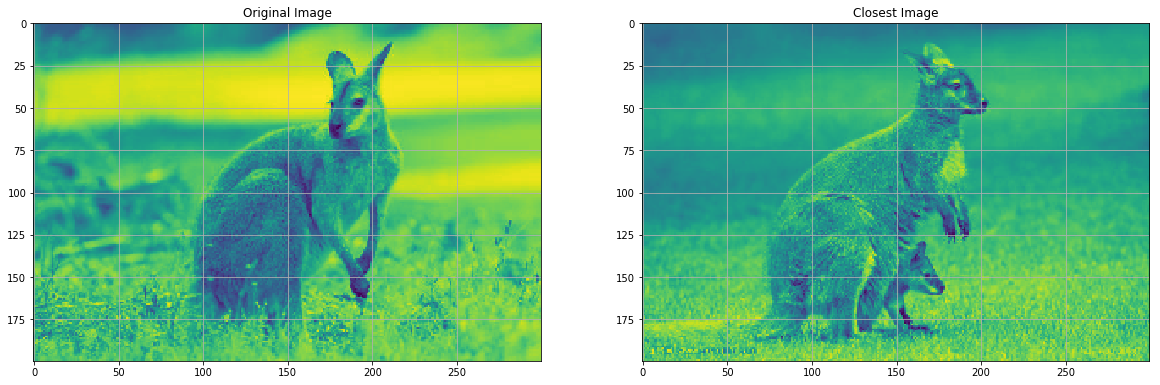

In [418]:
import copy
# find closest image to current image
idx1 = 1000
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.imshow(X[idx1].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
plt.imshow(X[idx2].reshape((h,w)))
plt.title("Closest Image")
plt.grid()
plt.show()

In [419]:
from ipywidgets import fixed
# put it together inside a nice widget
def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(20,16))
    plt.subplot(1,3,1)
    plt.imshow(X[idx1].reshape((h,w)))
    plt.title("Original Image "+ str(Y[idx1]))
    plt.grid()

    plt.subplot(1,3,2)
    plt.imshow(X[idx2].reshape((h,w)))
    plt.title("Closest Image  "+ str(Y[idx2]))
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.imshow(X[idx3].reshape((h,w)))
    plt.title("Next Closest Image "+ str(Y[idx3]))
    plt.grid()
    plt.show()
widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)

A Jupyter Widget

<function __main__.closest_image>

## 3.5 Gabor Kernels for Feature Extraction

In [420]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy import stats

# prepare filter bank kernels
kernels = []
X = np.array(data)
Y = np.array(target)
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

            
# compute the filter bank and take statistics of image
def compute_gabor(row, kernels, shape):
    feats = np.zeros((len(kernels), 4), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(row.reshape(shape), kernel, mode='wrap')
        _,_,feats[k,0],feats[k,1],feats[k,2],feats[k,3] = stats.describe(filtered.reshape(-1))
        # mean, var, skew, kurt
        
    return feats.reshape(-1)

idx_to_reconstruct = int(np.random.rand(1)*len(X))

gabr_feature = compute_gabor(X[idx_to_reconstruct], kernels, (h,w))
gabr_feature

array([  1.12476850e+02,   3.28680368e+03,   4.29120523e-02,
        -1.24360299e+00,   3.41175833e+01,   3.45956623e+02,
         5.44727021e-01,   4.55713684e+00,   7.57130833e+01,
         1.34133792e+03,   6.96486488e-02,  -1.20792300e+00,
         2.64250833e+01,   5.95218266e+03,   2.61123590e+00,
         4.82024950e+00,   1.12479333e+02,   3.28664705e+03,
         4.21614378e-02,  -1.24393566e+00,   3.41478667e+01,
         3.40739348e+02,   4.20375482e-01,   3.37973746e+00,
         7.63712667e+01,   1.36457834e+03,   5.54085681e-02,
        -1.21538977e+00,   2.09561167e+01,   4.86350632e+03,
         3.05089507e+00,   7.30872301e+00,   1.12476533e+02,
         3.28685003e+03,   4.16375776e-02,  -1.24396320e+00,
         3.47252500e+01,   4.55828326e+02,   2.79833152e+00,
         2.70204814e+01,   7.57125667e+01,   1.35368368e+03,
         3.35006261e-02,  -1.21746620e+00,   2.46151667e+01,
         5.57818294e+03,   2.74200039e+00,   5.52139944e+00,
         1.12478917e+02,

In [421]:
# takes ~3 minutes to run entire dataset
%time gabor_stats = np.apply_along_axis(compute_gabor, 1, X, kernels, (h,w))
print(gabor_stats.shape)

CPU times: user 3min 56s, sys: 1.11 s, total: 3min 57s
Wall time: 3min 59s
(1203, 64)


In [422]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix_gabor = pairwise_distances(gabor_stats)

CPU times: user 20.7 ms, sys: 5.54 ms, total: 26.2 ms
Wall time: 25.3 ms


In [423]:
widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix_gabor),__manual=True)

A Jupyter Widget

<function __main__.closest_image>

## 4. HOG Feature Extraction and KNN Classifier

In [378]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray

#HOG-feature extraction
fds = np.array
init = True

for image in data:
    image = image.reshape((h,w))
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1),feature_vector=True, visualise=True)
    fd = np.array(fd.reshape(1,len(fd)))
    if(init):
        fds = fd
        init = False
        continue
    fds = np.vstack((fds,fd))
#print(fds.shape)

#KNeighborClassifier
X = np.array(fds)
#print(X.shape)
y = np.array(ds.target)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y) 
%time

/Users/zhoujiwen/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation:

Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15



CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


Lion


/Users/zhoujiwen/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation:

Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15



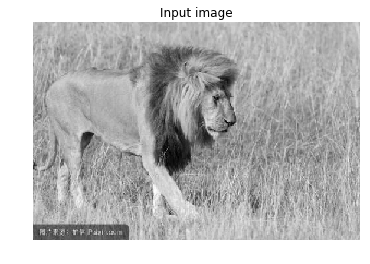

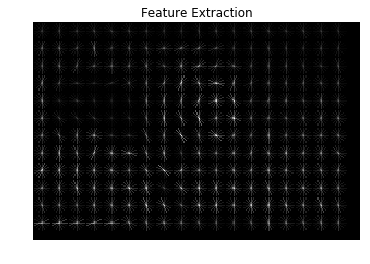

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


In [380]:
import random
imagenum = random.randint(1,len(data))
#for imagenum in range(len(ds.data)):
#img1 = Image.open("test1.jpg").convert("L").resize((300,200))

fd1, hog_image1 = hog(data[imagenum].reshape((h,w)), orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1),feature_vector=True, visualise=True)
catg = neigh.predict([fd1])
if catg[0]==0:
    print("Lion")
elif catg[0]==1:
    print("Zebra")
elif catg[0]==2:
    print("Flamingo")
elif catg[0]==3:
    print("Rhinoceros")
elif catg[0]==4:
    print("Wolves")
elif catg[0]==5:
    print("Monkey")
elif catg[0]==6:
    print("Antelope")
elif catg[0]==7:
    print("Tiger")
elif catg[0]==8:
    print("Kangaroo")
elif catg[0]==9:
    print("Rabbit")
else:
    print("Giraffe")
#print(neigh.predict_proba([fd1]))

plt.axis('off')
plt.imshow(data[imagenum].reshape((h,w)), cmap=plt.cm.gray)
plt.title('Input image')
plt.show()

plt.axis('off')
plt.imshow(hog_image1, cmap=plt.cm.gray)
plt.title('Feature Extraction')
plt.show()

%time

HOG is a feature descriptor for the purpose of object detection. The reason why I decide HOG is that it is the only one said it was used to animal detection. However, the result might be not perfect as I imagined.

Our result shows that HOG will mix things up on some details, such as the ear of zebra and the horn of rhinoceros or tiger and female lion.

In addition, it might because most of the training images are shown a group of animals, like flamingo. Then, when the image shows only one flamingo, it will be classified into rabbit sometimes. For this problem, the first solution is we can regard a group of animals and individual animal as two different categaries. The second one is to enlarge the training data.

[1] Q. Wang. Kernel principal component analysis and its applications in face recognition and active shape models. CoRR, abs/1207.3538, 2012.

[2] Cai, Zhaoquan & Yu, Pan & Liang, Yihui & Lin, Bin & Huang, Han. (2016). SVM-KNN Algorithm for Image Classification Based on Enhanced HOG Feature. 111-117. 10.12792/icisip2016.023.